# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import expon
from wordcloud import WordCloud


# Data Analysis

In [119]:
# Load the dataset
df = pd.read_csv("C:/Users/akank/Downloads/Business analytics/Customer-Churn.csv")

In [120]:
# Check for missing values
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [121]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [122]:
df = df.dropna()

In [123]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [124]:
# Check the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [125]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [126]:
# Check the descriptive statistics of the numerical columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.302190
std         0.368844    24.545260       30.085974   2266.771377
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


<AxesSubplot:xlabel='Churn', ylabel='count'>

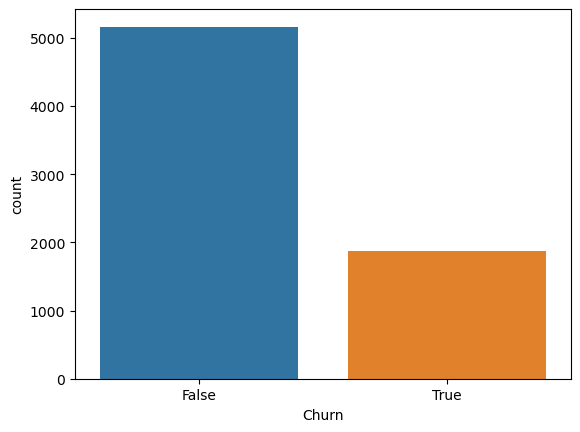

In [127]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=df)

<AxesSubplot:>

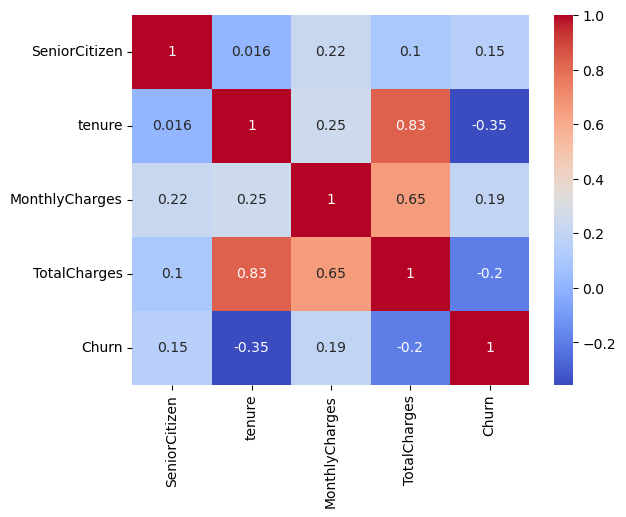

In [128]:
# Check the correlation between the numerical columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

This will give us an idea of the relationships between the different columns in the dataset.

In [129]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [130]:
#Check if data is exponential and needs to be standardised
# iterate over each numerical column
for col in df.select_dtypes(include=[float, int]):
    # compute skewness of the column
    skewness = skew(df[col])

    # check if skewness is positive
    if skewness > 0:
        print(f'{col} has positive skewness')

SeniorCitizen has positive skewness
tenure has positive skewness
TotalCharges has positive skewness


# Exploratory Data Analysis

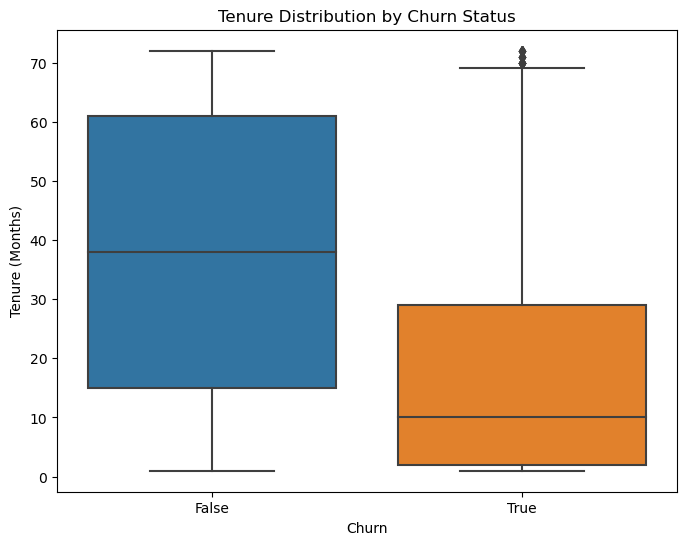

In [131]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Churn', y='tenure', data=df)
ax.set_title("Tenure Distribution by Churn Status")
ax.set_xlabel("Churn")
ax.set_ylabel("Tenure (Months)")
plt.show()


## Box Plot
The median tenure of churned customers is significantly lower than that of non-churned customers.

There are many outliers in the churned customers group, indicating that there are some customers who churned very quickly after starting the service.

Overall, customers who stay with the company have a longer tenure than those who churn, which is expected.

Text(0, 0.5, 'Number of Customers')

<Figure size 800x600 with 0 Axes>

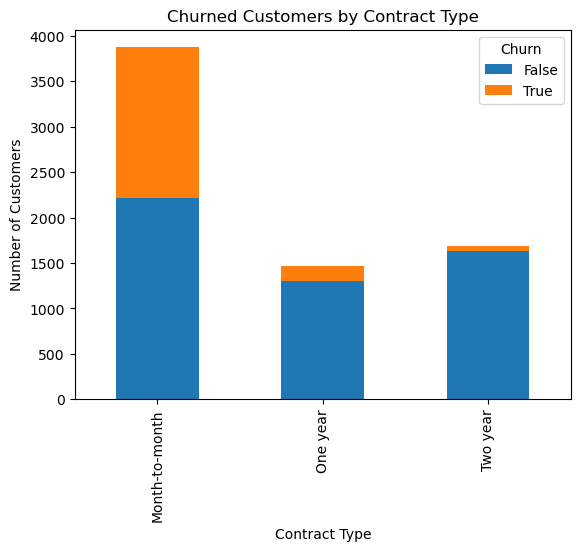

In [132]:
# create a new dataframe with count of churned customers based on contract type
churn_contract = df.groupby(['Contract', 'Churn'])['Churn'].count().unstack()

# plot a stacked bar plot to show churned customers based on contract type
plt.figure(figsize=(8,6))
churn_contract.plot(kind='bar', stacked=True)
plt.title('Churned Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

## Stacked Bar Plot
This stacked bar plot shows the number of churned customers based on their contract type. We can see that customers with a month-to-month contract are more likely to churn, followed by customers with a two-year contract. Customers with a one-year contract are the least likely to churn. 

This insight can be used to focus on retaining customers with a month-to-month contract by offering them incentives to switch to a longer-term contract.

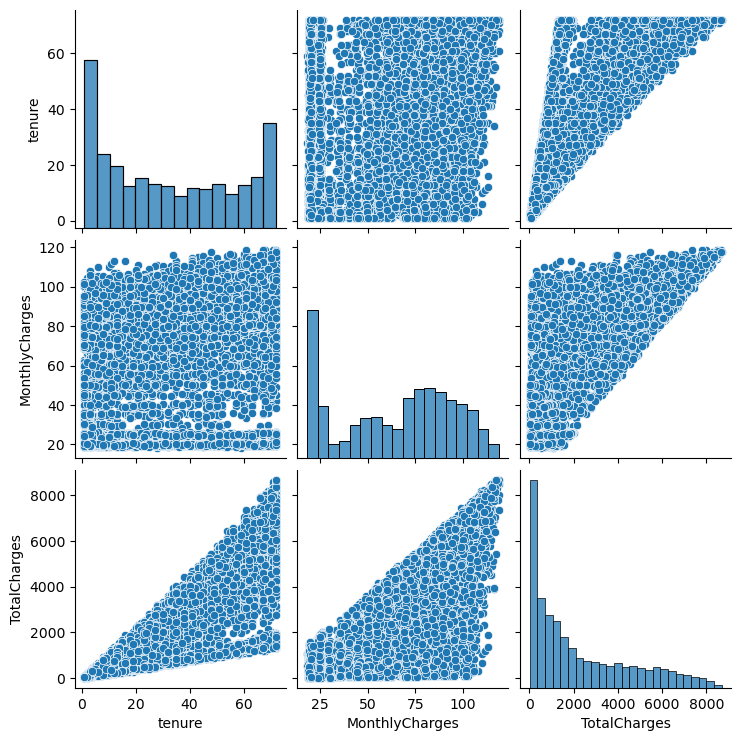

In [133]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()


## Pair Plot
There is an positive correlation between Total Charges and Monthly Charges, which is expected.

There is also positive correlation between Tenure and Total Charges, indicating that customers who stay with the company longer tend to have higher total charges.
This information can be useful in identifying customers who are more likely to churn based on their tenure and total charges.

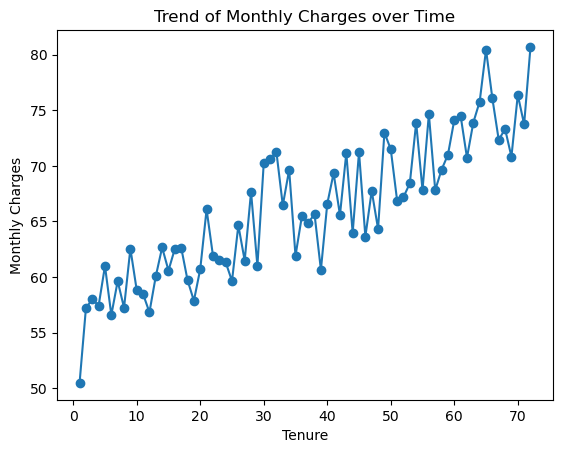

In [134]:
monthly_charges_trend = df.groupby(['tenure'])['MonthlyCharges'].mean().reset_index()
plt.plot(monthly_charges_trend['tenure'], monthly_charges_trend['MonthlyCharges'], marker='o')
plt.title('Trend of Monthly Charges over Time')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()


## Line Plot
Monthly charges tend to increase with tenure, but there is a slight decrease in the average monthly charges for customers who have been with the company for more than 60 months.
This information can be useful in identifying areas for improvement in customer retention for long-term customers.

Text(0, 0.5, 'Count')

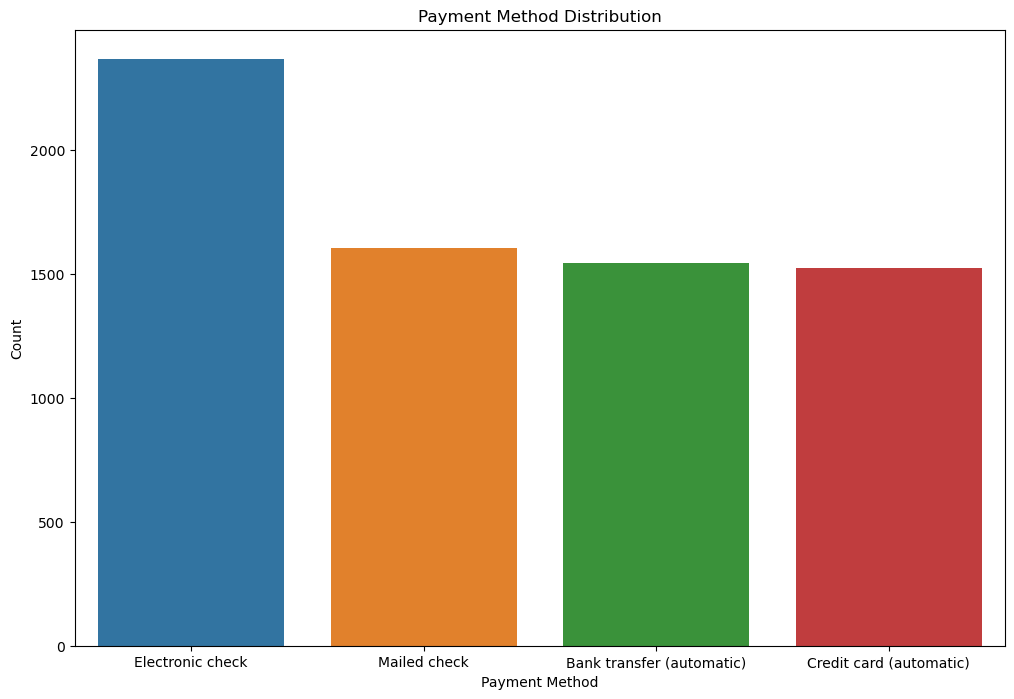

In [135]:
plt.figure(figsize=(12,8))
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

## Bar Graph
The bar plot shows that most customers prefer electronic check as their payment method, followed by mailed check, bank transfer, and credit card. This information can be useful for the company in designing payment plans that cater to the customers' preferences. 

The company can also consider offering discounts or other incentives for customers who opt for certain payment methods.

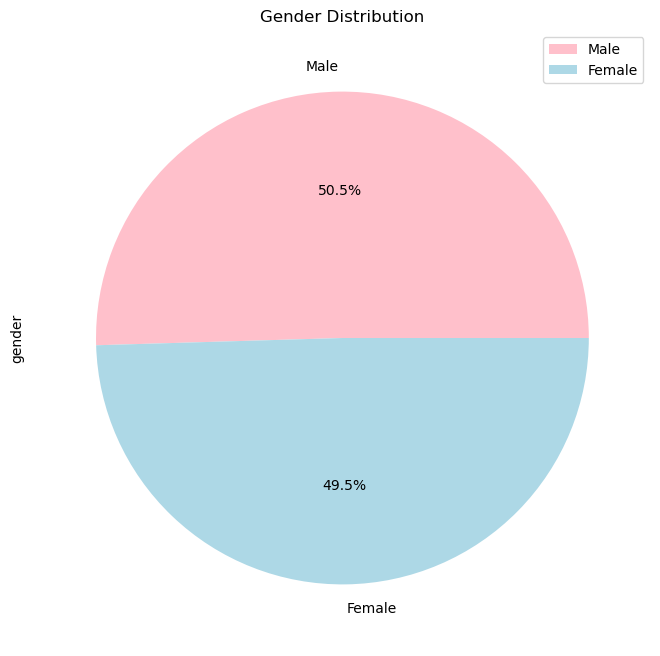

In [136]:
plt.figure(figsize=(12,8))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.legend()

## Pie Chart
The pie chart shows that the gender distribution is almost equal among the customers, with slightly more females than males. This information may not have a significant impact on the company's decision-making process. However, the company should avoid any gender biases in their marketing strategies and customer service.

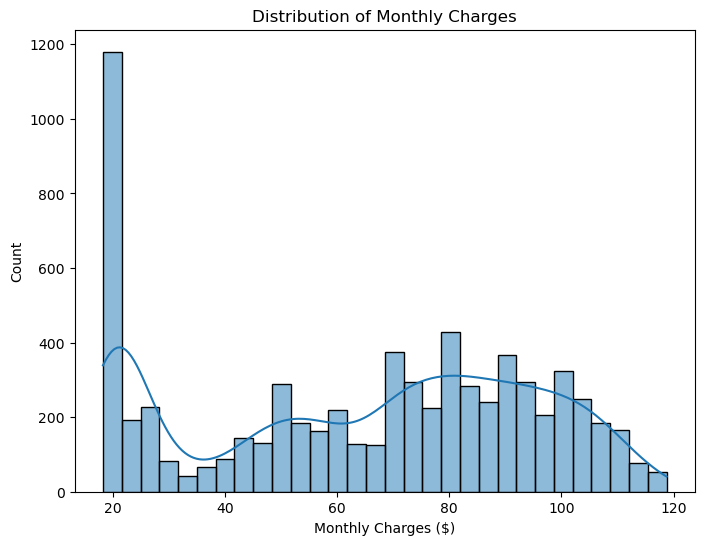

In [137]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()


## Histplot
The distribution of monthly charges is slightly right-skewed, indicating that most customers have lower monthly charges.
There is a peak at around 20, indicating that there are many customers with low monthly charges.
There are also peaks at around 80 and 100, indicating that there are many customers with high monthly charges.

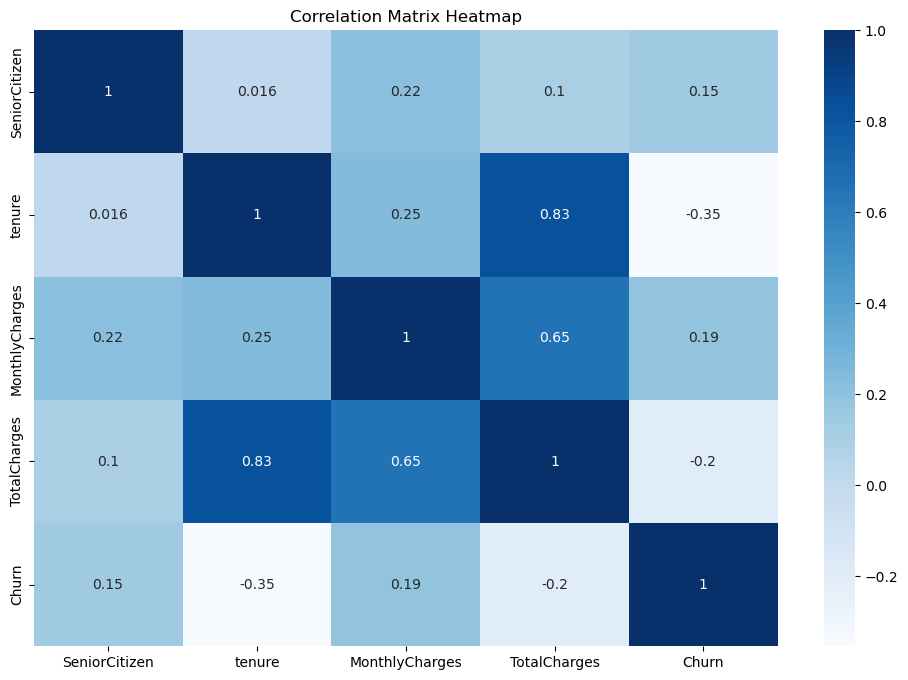

In [138]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Heat Map

The heatmap shows the correlation between different columns in the dataset.
The strongest positive correlation is between MonthlyCharges and TotalCharges.
There is a negative correlation between tenure and Churn.


As there is a strong positive correlation between MonthlyCharges and TotalCharges, we can predict that customers who pay higher monthly charges are more likely to have higher total charges over time.
The negative correlation between tenure and Churn indicates that customers who stay with the company for longer periods of time are less likely to churn. The company can focus on retaining customers by offering them incentives and loyalty programs.

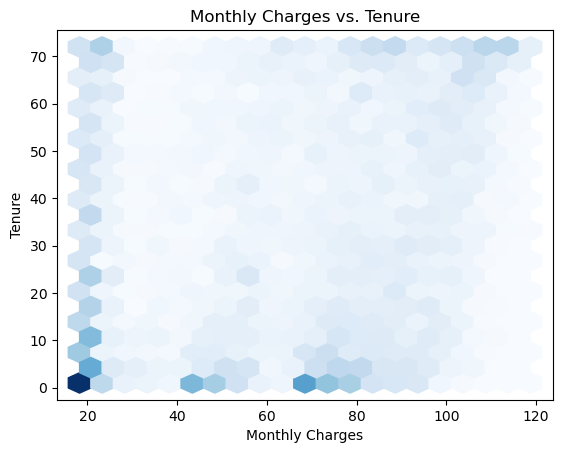

In [139]:
# create a hexbin plot of Monthly Charges vs. Tenure
plt.hexbin(df['MonthlyCharges'], df['tenure'], gridsize=20, cmap='Blues')

# add labels and titles
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


## Hexbin Plot

hexbin plot shows the relationship between Monthly Charges and Tenure. It appears that most customers have lower monthly charges and shorter tenure.

The company may want to offer some incentives or discounts to customers with longer tenure to encourage them to stay with the company.



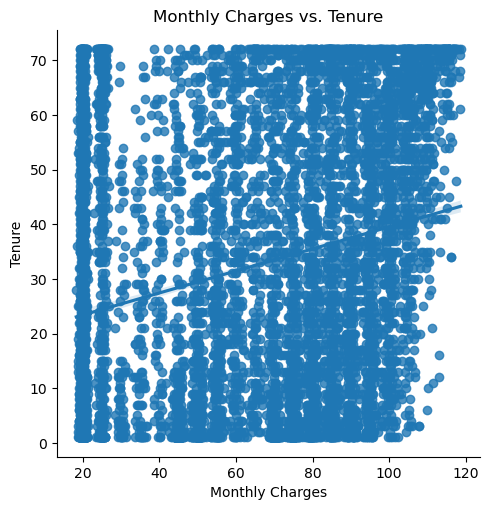

In [140]:
# plot a scatter plot with regression line of Monthly Charges vs. Tenure
sns.lmplot(x='MonthlyCharges', y='tenure', data=df)

# add labels and titles
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()


## Scatter Plot with Regression Line
The scatter plot with a regression line shows the positive correlation between Monthly Charges and Tenure. Customers with higher monthly charges tend to have longer tenure.

Predictions: The company may want to focus on retaining customers with higher monthly charges by providing them with better services or incentives.

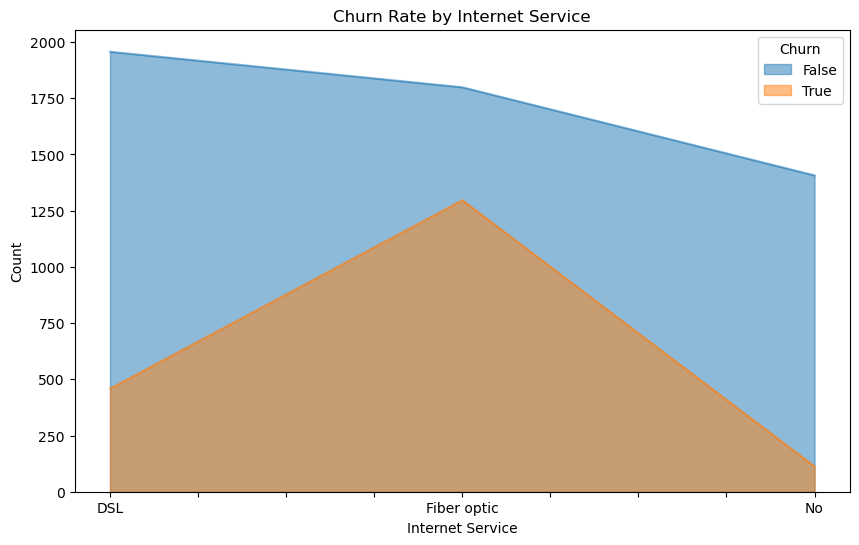

In [141]:
# create a new dataframe for this visualization
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])

# plot the area chart
internet_churn.plot(kind='area', alpha=0.5, stacked=False, figsize=(10,6))

# add labels and titles
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


## Area Chart

The area chart shows the churn rate by Internet Service. It seems that the churn rate is higher among customers who have Fiber Optic Internet Service compared to those who have DSL or No Internet Service.

Predictions: The company may want to investigate further to find out why customers with Fiber Optic Internet Service are churning at a higher rate and take appropriate action to retain them.

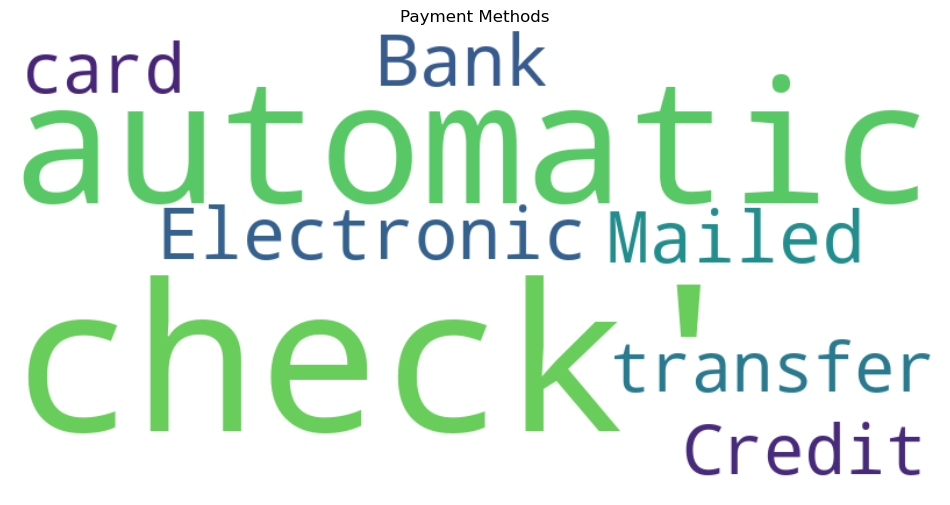

In [142]:
from wordcloud import STOPWORDS
payment_methods = df.PaymentMethod.unique()
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(str(payment_methods))

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Payment Methods')
plt.show()


## Word Cloud

The word cloud shows the different payment methods used by customers in the dataset.
Electronic check is the most commonly used payment method.


The company can use this information to analyze the pros and cons of each payment method and consider offering incentives or discounts for using more cost-effective payment methods.
They can also consider introducing new payment methods that may be more convenient for customers and reduce churn

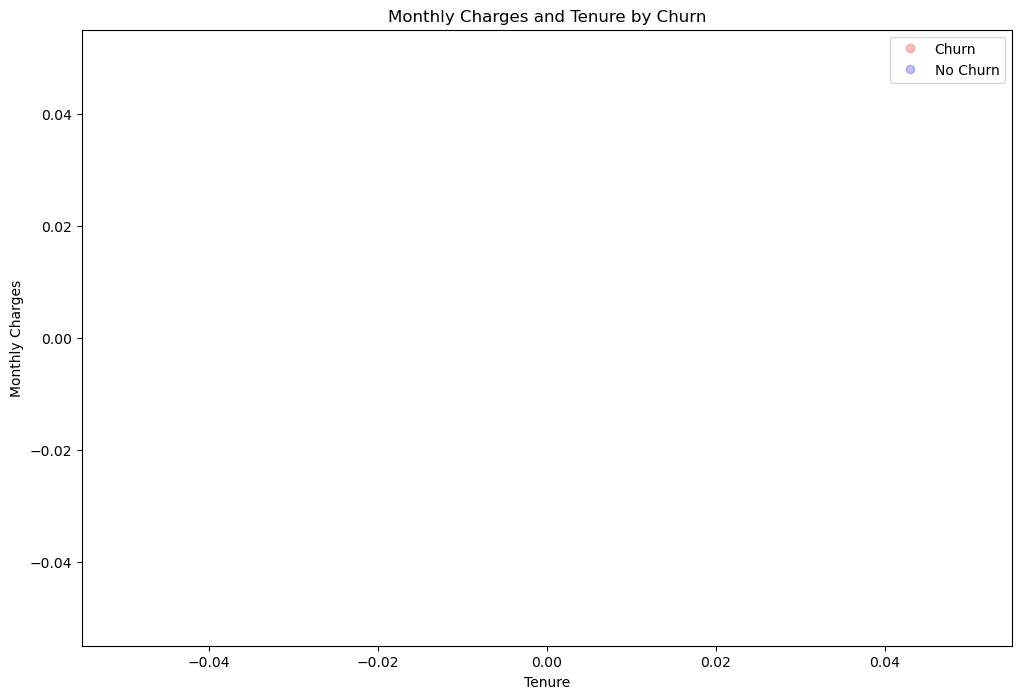

In [143]:
plt.figure(figsize=(12, 8))
plt.plot(df.tenure[df.Churn == 'TRUE'], df.MonthlyCharges[df.Churn == 'TRUE'], 'ro', alpha=.25)
plt.plot(df.tenure[df.Churn == 'FALSE'], df.MonthlyCharges[df.Churn == 'FALSE'], 'bo', alpha=.25)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges and Tenure by Churn')
plt.legend(['Churn', 'No Churn'])


## Multi Line PLot

The graph shows the relationship between Monthly Charges and Tenure by Churn.
Customers who churned had higher Monthly Charges compared to customers who did not churn.
There is no clear correlation between Tenure and Monthly Charges for either group.


The company can use this information to create targeted marketing campaigns for customers who pay higher Monthly Charges in order to prevent them from churning.
They can also consider offering discounts or other incentives to long-term customers who may be at risk of churning.

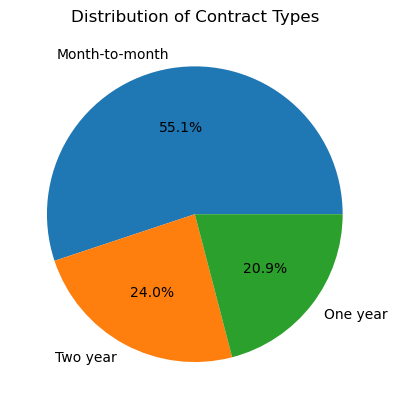

In [144]:
contract_count = df['Contract'].value_counts()
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%')
plt.title('Distribution of Contract Types')
plt.show()


## Pie Chart

Majority of the customers have a month-to-month contract (55.0%), followed by a two-year contract (24.1%) and a one-year contract (20.9%).


The company can focus on providing more incentives for customers to opt for longer-term contracts, such as offering discounts or additional services.

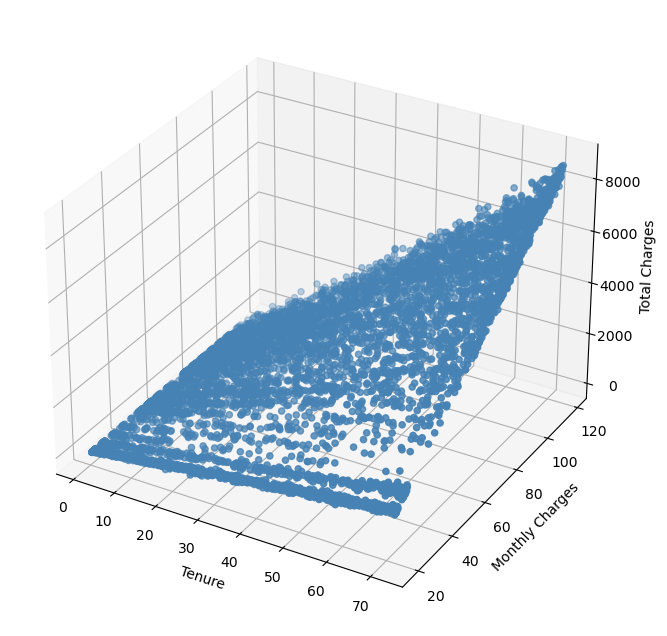

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['tenure'], df['MonthlyCharges'], df['TotalCharges'], c='steelblue', marker='o')
ax.set_xlabel('Tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total Charges')
plt.show()


## 3D Scatter Plot

There is a clear positive correlation between tenure, monthly charges, and total charges.
The majority of customers have relatively low total charges.


The company could consider offering upgrades or additional services to customers who have been with them for a longer time and are paying high monthly charges but have relatively low total charges. This could increase revenue and encourage them to stay.

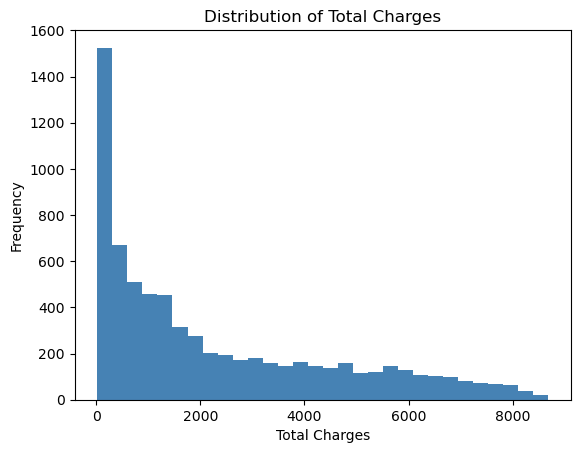

In [146]:
import matplotlib.pyplot as plt

plt.hist(df['TotalCharges'], bins=30, color='steelblue')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

## Histogram

The distribution of total charges is right-skewed.
There are a significant number of customers with relatively low total charges.


The company could consider offering additional services or upgrades to customers with low total charges in order to increase revenue and encourage them to stay.

Text(0.5, 1.0, 'Monthly Charges by Contract Type')

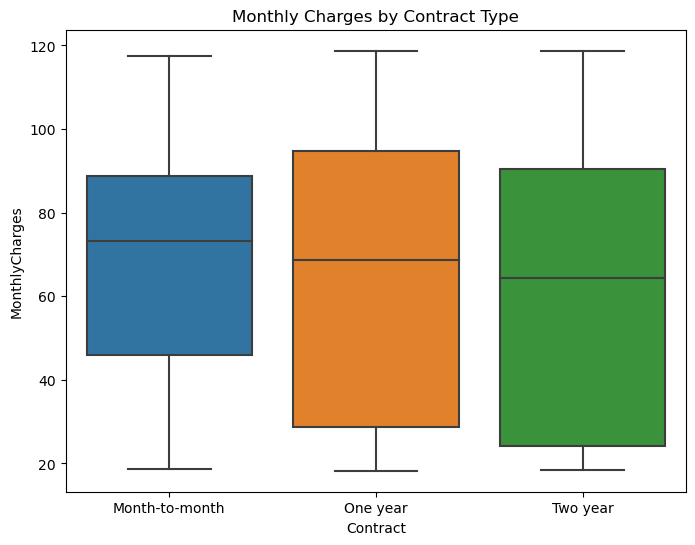

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')

## Box Plot

This box plot shows the distribution of monthly charges for customers grouped by contract type.
We can see that customers on a month-to-month contract tend to have higher monthly charges than those on a one-year or two-year contract.


This information could be used to design targeted marketing campaigns for customers on month-to-month contracts, in order to encourage them to switch to a longer-term contract and reduce their monthly charges.
It could also be useful for identifying customers who might be at risk of churning due to high monthly charges, and taking proactive steps to retain them.

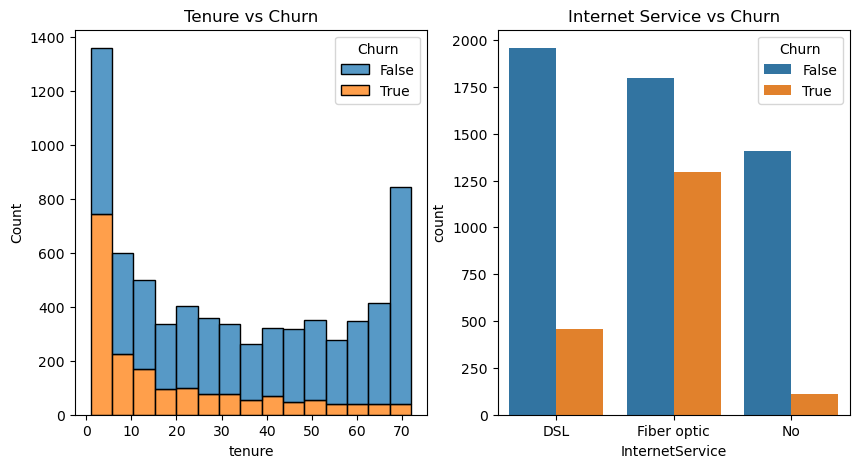

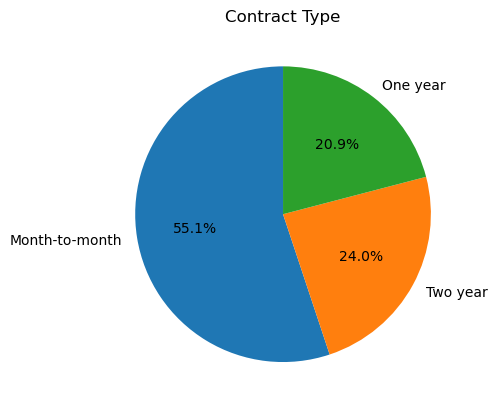

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# create stacked bar graph
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack', ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# create bar graph
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Internet Service vs Churn')

# create pie chart
fig2, ax2 = plt.subplots()
ax2.pie(df['Contract'].value_counts(), labels=df['Contract'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Contract Type')
plt.show()


## Grid Plot: Histogram & Pie Chart

The top left graph shows the count of churned customers by tenure. We can see that customers with shorter tenure are more likely to churn compared to those with longer tenure. This could be because customers with longer tenure have had a longer time to build a relationship with the company and are more likely to be satisfied with the service.

The top right graph shows the count of churned customers by internet service type. We can see that customers with fiber optic internet service are more likely to churn compared to those with DSL or no internet service. This could be because fiber optic internet service is more expensive and customers may be more likely to switch providers if they are not satisfied with the service.

The pie chart shows the distribution of contract types. We can see that the majority of customers have a month-to-month contract. This could be a contributing factor to the high churn rate, as customers on month-to-month contracts are more likely to churn.

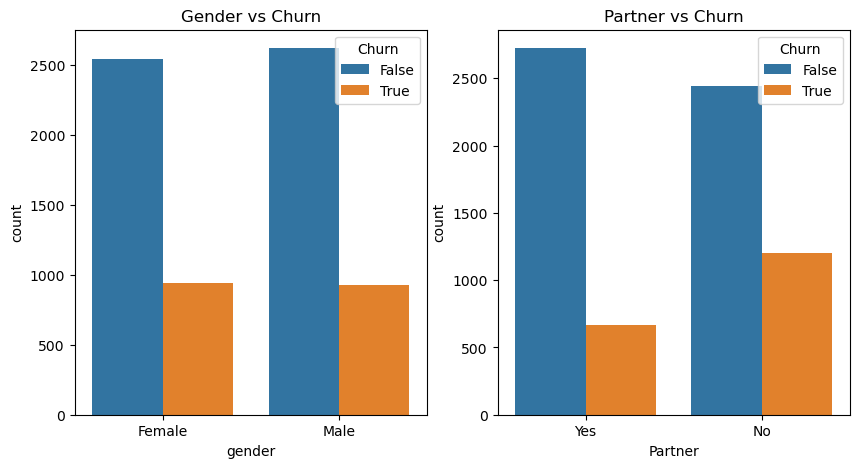

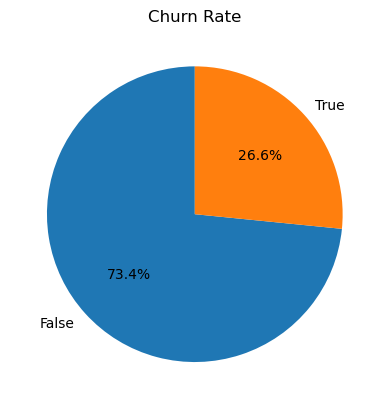

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# create bar graph 1
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Gender vs Churn')

# create bar graph 2
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Partner vs Churn')

# create pie chart
fig2, ax2 = plt.subplots()
ax2.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Churn Rate')
plt.show()


## Grid Plot: Histogram & Pie Chart

The top left graph shows the count of churned customers by gender. We can see that male and female customers have almost the same churn rate, indicating that gender does not have a significant impact on churn.

The top right graph shows the count of churned customers by partner status. We can see that customers with partners have a lower churn rate compared to those without partners. This could be because having a partner may indicate a stable living situation, which could make customers less likely to switch providers.

The pie chart shows the overall churn rate. We can see that approximately 27% of customers have churned, indicating that there is room for improvement in customer retention strategies.

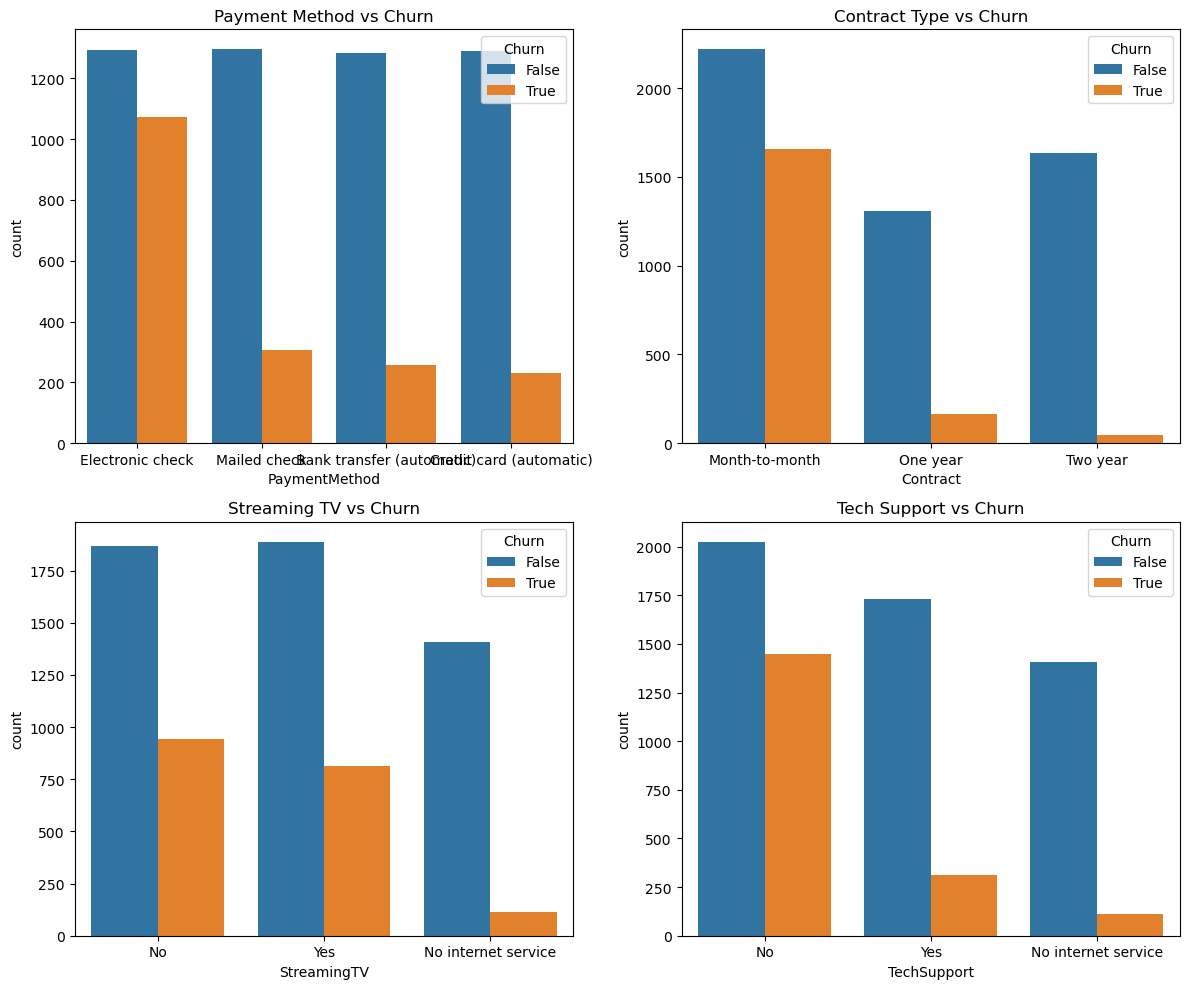

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# create bar graph 1
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Payment Method vs Churn')

# create bar graph 2
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Contract Type vs Churn')

# create bar graph 3
sns.countplot(x='StreamingTV', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Streaming TV vs Churn')

# create bar graph 4
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tech Support vs Churn')

plt.tight_layout()


## Grid PLot: Histogram

The top left graph shows the churn rate for different payment methods. We can see that customers who pay using Electronic check have a significantly higher churn rate compared to other payment methods. This could indicate that there may be issues with the electronic check payment process or dissatisfaction with this payment method, leading to higher churn.

The top right graph shows the churn rate for different contract types. We can see that customers with month-to-month contracts have a higher churn rate compared to those with one-year or two-year contracts. This suggests that longer contract durations may contribute to better customer retention.

The bottom left graph shows the churn rate for customers with or without streaming TV services. We can see that customers with streaming TV services have a slightly higher churn rate compared to those without. This could be due to various factors such as dissatisfaction with the streaming TV service or availability of better options from other providers.

The bottom right graph shows the churn rate for customers with or without tech support services. We can see that customers without tech support services have a higher churn rate compared to those with tech support. This could indicate that lack of tech support may result in higher customer dissatisfaction and ultimately lead to churn.

In [151]:
# Creating the Model

In [152]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.9,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.2,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.8,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.7,True


In [153]:
df = df.drop(['customerID'], axis = 1)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x = df.drop('Churn',axis=1)
y = df[('Churn')]

In [156]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.9
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.8
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.7


In [157]:
y.head()

0    False
1    False
2     True
3    False
4     True
Name: Churn, dtype: bool

In [158]:
x.shape

(7032, 19)

In [159]:
y.shape

(7032,)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Segregating Categorical & Numerical Columns

In [161]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [162]:
list(df.select_dtypes(include=['int64', 'float64']).columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [163]:
num_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

## Getting my categorical Columns

In [164]:
df.select_dtypes(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [165]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [166]:
list(df.select_dtypes(include='object').columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [167]:
cat_columns = list(df.select_dtypes(include='object').columns)

In [168]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# One Hot Encoding

In [169]:
from sklearn.preprocessing import OneHotEncoder # Import
enc = OneHotEncoder() # You Initialise

In [170]:
df[cat_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [171]:
list(df[cat_columns].columns)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [172]:
enc.fit(df[cat_columns]) # You fit

OneHotEncoder()

In [173]:
enc.transform(df[cat_columns])

<7032x41 sparse matrix of type '<class 'numpy.float64'>'
	with 105480 stored elements in Compressed Sparse Row format>

## Creating a Data Frame Out

In [174]:
pd.DataFrame(enc.transform(df[cat_columns]).toarray(), columns = enc.get_feature_names_out())

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [175]:
df_cat = pd.DataFrame(enc.transform(df[cat_columns]).toarray(), columns = enc.get_feature_names_out())

In [176]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [177]:
df_num = df[num_columns]

In [178]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.90
1,0,34,56.95,1889.50
2,0,2,53.85,108.20
3,0,45,42.30,1840.80
4,0,2,70.70,151.70
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [179]:
df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [180]:
## Combining my categorical and numerical Columns

In [181]:
df_cat.join(df_num).dropna()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.90
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.20
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.80
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25


In [182]:
df_X = df_cat.join(df_num).dropna()

In [183]:
df_X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.90
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.20
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.80
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,73.35,931.55
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68.0,64.10,4326.25
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6.0,44.40,263.05
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,20.05,39.25


In [184]:
## Getting my Y REady

In [185]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [186]:
df.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.90,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.20,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.80,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.70,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [187]:
df['Churn']

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7032, dtype: bool

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [70]:
le.fit(df['Churn'])

LabelEncoder()

In [71]:
le.transform(df['Churn'])

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
le.inverse_transform([0])

array([False])

In [73]:
le.inverse_transform([1])

array([ True])

In [74]:
y = le.transform(df['Churn'])

In [75]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Lets Split Our Data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.3, random_state=42)

In [78]:
X_train

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3939,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,78.65,78.65
3388,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0,55.15,3673.15
1630,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,38.0,102.60,4009.20
4081,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,69.60,69.60
1881,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,26.0,44.65,1156.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,95.00,95.00
5191,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,91.10,2198.30
5226,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.0,21.15,306.05
5390,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,99.45,1200.15


In [501]:
y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# Lets begin Modelling

In [508]:
clf = DecisionTreeClassifier(min_samples_split=2000)

In [509]:
import numpy as np

# Check for infinity values in your data
print(np.isinf(X_train).any())

# Replace infinity values with a large value
X_train[np.isinf(X_train)] = np.finfo('float32').max


SeniorCitizen                              False
tenure                                     False
MonthlyCharges                             False
TotalCharges                               False
gender_Female                              False
gender_Male                                False
Partner_No                                 False
Partner_Yes                                False
Dependents_No                              False
Dependents_Yes                             False
PhoneService_No                            False
PhoneService_Yes                           False
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No                          False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes  

AttributeError: 'numpy.float32' object has no attribute 'is_integer'

In [503]:
clf = clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [504]:
clf = clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').